<a href="https://colab.research.google.com/github/Dattaraj-jayade/MLWorkshop/blob/main/Facial_Recognition/Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facial Recognition**  
Facial recognition is the process of identifying or verifying a person's identity using their face. It captures, analyzes, and compares patterns based on the person's facial details. The face detection process is an essential step in detecting and locating human faces in images and videos.

**Download Test Images**  
[Shahrukh Image](https://drive.google.com/file/d/1gUjjeWj2UmWDjl4uk5ILWR2BJ_w3DP9_/view?usp=drive_link)  
[Rajnikanth Image](https://drive.google.com/file/d/1Tlehe26RCwBMHhj3BSn7rLxSU9Gn7f-l/view?usp=drive_link)  
[Test Image](https://drive.google.com/file/d/1d2SBgAe5ivM23OOmGk2Ktp_rLeTSg5X1/view?usp=drive_link)

**Install Face-Recognition Library**

In [1]:
!pip uninstall -y dlib face_recognition

Found existing installation: dlib 19.24.6
Uninstalling dlib-19.24.6:
  Successfully uninstalled dlib-19.24.6


**Import Required Libraries**

In [2]:
# Install the working dlib CPU-only build
!pip install dlib-bin==19.24.6

# Install only the models
!pip install face-recognition-models

# Manually install face_recognition WITHOUT forcing a dlib build
!pip install git+https://github.com/ageitgey/face_recognition.git#egg=face_recognition --no-deps



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.1 MB/s eta 0:00:00
  Using cached face_recognition_models-0.3.0.tar.gz (100.1 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=e27d0b858540ecdbadde607051be13c360a6a29bc7e3f0223dccd2522d9ea8d9
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models
  Cloning https://github.com/ageitgey/face_recognition.git to /tmp/pip-install-oqe6frp6/face-recognition_f11a551477e34f5f84a412bcb74effde
  Running command git clone --filter=blob:none --quiet https://github.com/ageitgey/face_recognition.git /tmp/pip-install-oqe6frp6/face-recognition_f11a551477e34f5f84a412bcb74effde
  Resolved https://github.com/ageitgey/face_recognition.git to commit 2e2dccea9dd0ce730c8d464d0f67c6eebb40c9d1
  Installing build dependencies ... done
  Getti

In [3]:
import dlib
import cv2
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow
print("dlib version:", dlib.__version__)

dlib version: 19.24.6


**Predict Face Locations**

In [4]:
# load the image and extract face locations
image=face_recognition.load_image_file("shahrukh.jpg")
face_locations =face_recognition.face_locations(image)

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
 #image=face_recognition.load_image_file("rajnikanth.jpeg")
 #face_locations =face_recognition.face_locations(image)

In [6]:
face_locations

[(116, 408, 270, 253)]

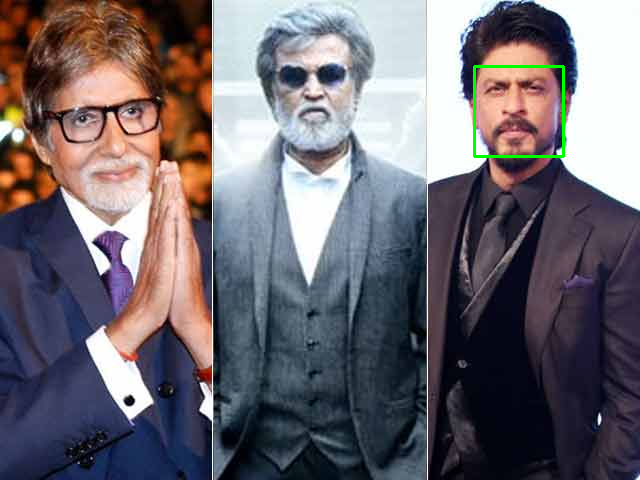

In [28]:
# display the extracted faces
image = cv2.imread('test.jpg')
top, right, bottom, left =  face_locations[0]
cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
cv2_imshow(image)

**Face Recogntion**

**Create Face Embeddings**

In [29]:
# load images
shahrukh_image = face_recognition.load_image_file("shahrukh.jpg")
rajnikanth_image = face_recognition.load_image_file("rajnikanth.jpeg")

In [30]:
# extract face encodings

shahrukh_face_encoding = face_recognition.face_encodings(shahrukh_image)[0]
rajnikanth_face_encoding = face_recognition.face_encodings(rajnikanth_image)[0]

In [31]:
known_face_names = ['Shahrukh Khan', 'Rajnikanth']
known_face_encodings = [shahrukh_face_encoding, rajnikanth_face_encoding]

**Test Predictions - Extract Face Locations and Encodings**

In [32]:
shahrukh_encoding = face_recognition.face_encodings(shahrukh_image)
rajnikanth_encoding = face_recognition.face_encodings(rajnikanth_image)

if shahrukh_encoding and rajnikanth_encoding:
    known_face_names = ['Shahrukh Khan', 'Rajnikanth']
    known_face_encodings = [shahrukh_encoding[0], rajnikanth_encoding[0]]
else:
    print("❌ Face not found in reference images.")

In [33]:
test_image = face_recognition.load_image_file("test.jpg")

# Step 3: Detect faces in test image
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)


**Test Predictions - Find Face Matches**

In [34]:
face_names = []


In [35]:
# Recognize faces in the images
for face_encoding in face_encodings:
  matches=face_recognition.compare_faces(known_face_encodings, face_encoding)
  name = "Unknown"
  face_distances=face_recognition.face_distance(known_face_encodings,face_encoding)
  best_match_index=np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]

  face_names.append(name)




In [24]:
face_names

['Shahrukh Khan', 'Unknown', 'Rajnikanth']

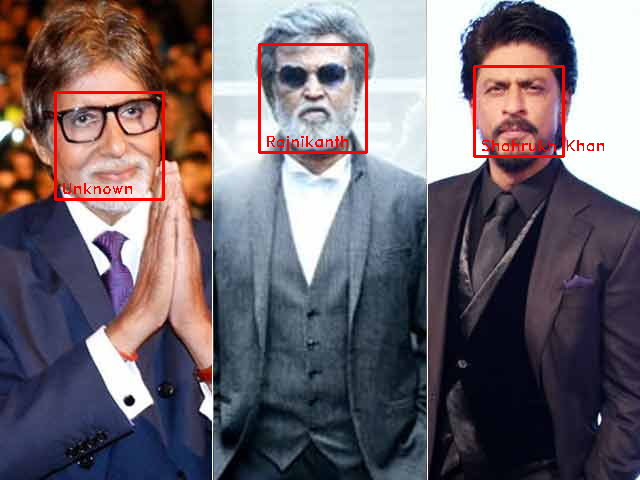

In [36]:
for (top, right, bottom, left), name in zip(face_locations, face_names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 0.5, (0, 0, 255), 1)

cv2_imshow(image)